In [2]:
import pandas as pd
A = pd.read_csv("C:/Users/Audi/Downloads/Cars93.csv")

In [3]:
Q = []
import re
for i in A.columns:
    Q.append(re.sub("[.]","",i))
    
A.columns = Q

In [4]:
A.head()

,id,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [5]:
from preprocessing_6PM import replacer
replacer(A)

In [11]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [12]:
Y = A[["Type"]]
X = A.drop(labels=["Type","id","Make","Model","Manufacturer"],axis=1)

In [14]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

0.0


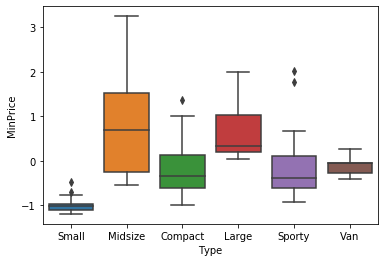

0.0


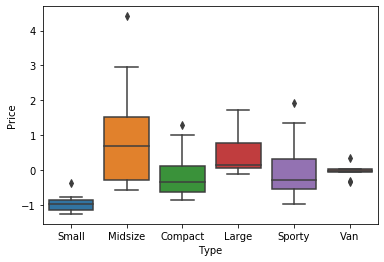

0.0


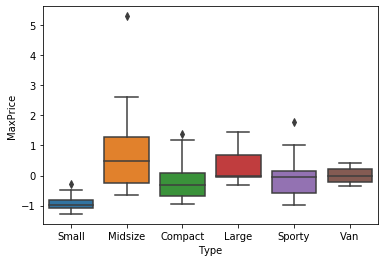

0.0


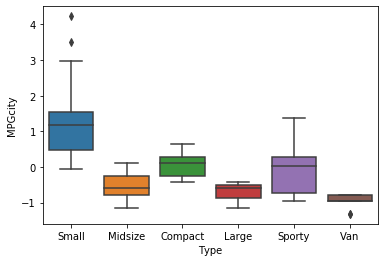

0.0


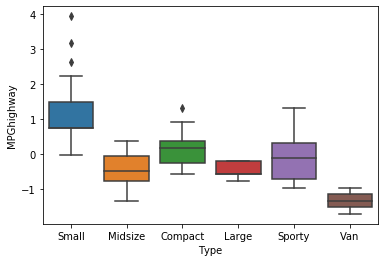

0.0


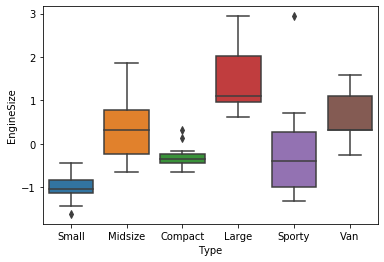

0.0


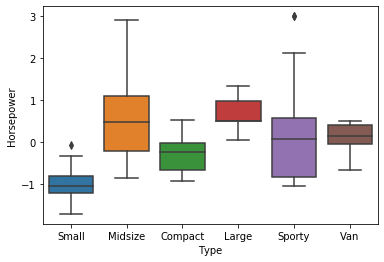

0.0


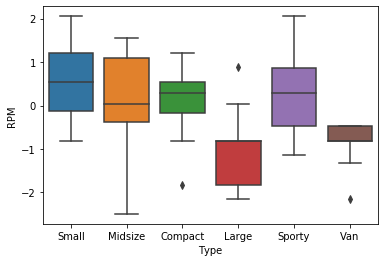

0.0


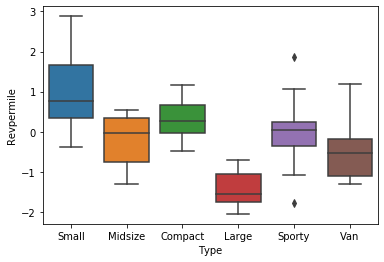

0.0


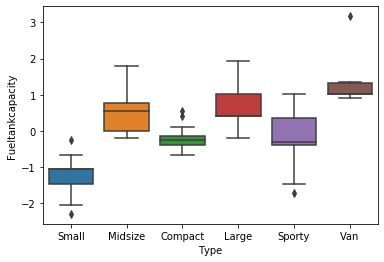

0.0


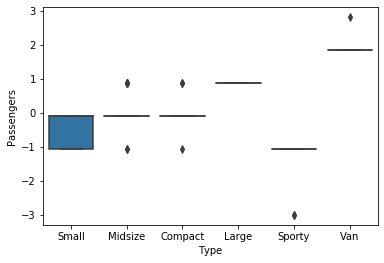

0.0


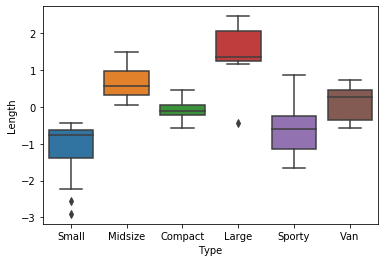

0.0


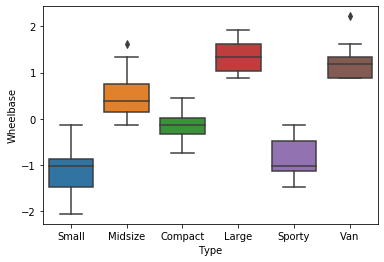

0.0


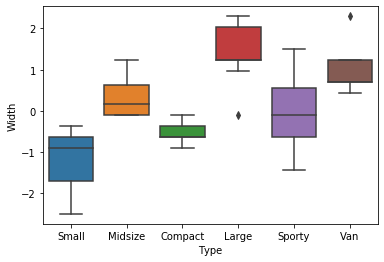

0.0


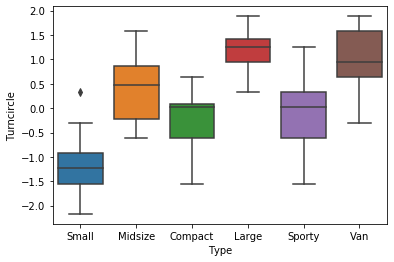

0.0


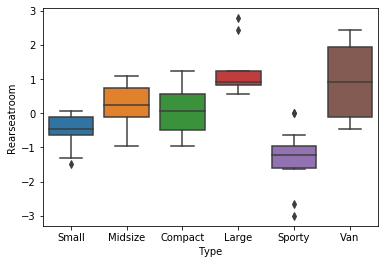

0.0


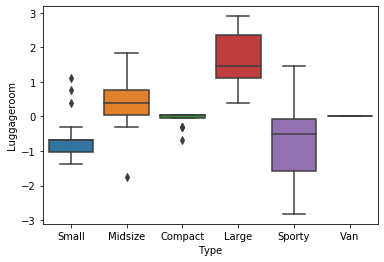

0.0


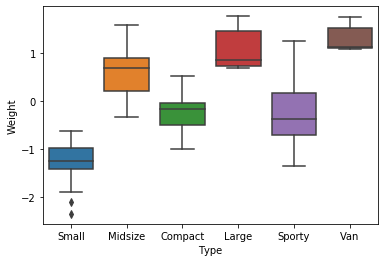

In [33]:
from seaborn import boxplot
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt

for i in con:
    print(ANOVA(A,"Type",i))
    boxplot(Y.Type,X[i])
    plt.show()

In [17]:
cat

['AirBags', 'DriveTrain', 'Cylinders', 'Mantransavail', 'Origin']

In [18]:
pd.crosstab(Y.Type,A.AirBags)

AirBags,Driver & Passenger,Driver only,None
Type,,,
Compact,2,9,5
Large,3,8,0
Midsize,6,12,4
Small,0,5,16
Sporty,3,9,2
Van,0,3,6


In [19]:
pd.crosstab(Y.Type,A.DriveTrain)

DriveTrain,4WD,Front,Rear
Type,,,
Compact,1,13,2
Large,0,7,4
Midsize,0,17,5
Small,2,19,0
Sporty,2,7,5
Van,5,4,0


In [20]:
pd.crosstab(Y.Type,A.Cylinders)

Cylinders,3,4,5,6,8,rotary
Type,,,,,,
Compact,0,15,0,1,0,0
Large,0,0,0,7,4,0
Midsize,0,7,1,12,2,0
Small,3,18,0,0,0,0
Sporty,0,8,0,4,1,1
Van,0,1,1,7,0,0


In [21]:
pd.crosstab(Y.Type,A.Mantransavail)

Mantransavail,No,Yes
Type,,
Compact,2,14
Large,11,0
Midsize,13,9
Small,0,21
Sporty,0,14
Van,6,3


In [22]:
pd.crosstab(Y.Type,A.Origin)

Origin,USA,non-USA
Type,,
Compact,7,9
Large,11,0
Midsize,10,12
Small,7,14
Sporty,8,6
Van,5,4


In [23]:
cat.remove("DriveTrain")
Xcat = pd.get_dummies(A[cat])

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
B = pd.DataFrame(ss.fit_transform(A[con]),columns=con)
X = B.join(Xcat)

In [25]:
X.head()

,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,EngineSize,Horsepower,RPM,Revpermile,Fueltankcapacity,...,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Mantransavail_No,Mantransavail_Yes,Origin_USA,Origin_non-USA
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0,1,0,0,0,0,0,1,0,1
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0,0,0,1,0,0,0,1,0,1
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0,0,0,1,0,0,0,1,0,1
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0,0,0,1,0,0,0,1,0,1
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0,1,0,0,0,0,0,1,0,1


In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,pred)

0.8421052631578947

In [29]:
confusion_matrix(ytest,pred)

array([[1, 0, 0, 0, 0, 0],
       [0, 2, 1, 0, 0, 0],
       [0, 0, 4, 0, 0, 0],
       [1, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [1, 0, 0, 0, 0, 1]], dtype=int64)

In [30]:
xtest.shape

(19, 31)

In [31]:
16/19

0.8421052631578947

In [32]:
B.skew()

MinPrice            1.182989
Price               1.533082
MaxPrice            2.033859
MPGcity             1.704430
MPGhighway          1.229897
EngineSize          0.859418
Horsepower          0.951728
RPM                -0.258533
Revpermile          0.281546
Fueltankcapacity    0.108146
Passengers          0.062517
Length             -0.090095
Wheelbase           0.113727
Width               0.264027
Turncircle         -0.133569
Rearseatroom        0.079086
Luggageroom         0.243936
Weight             -0.143669
dtype: float64